In [1]:
# Import libraries
import warnings
warnings.filterwarnings("ignore")

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance

In [2]:
import os
os.chdir("/kaggle/input/can-dataset-5")
df=pd.read_csv('Car_Hacking_5.csv')

In [3]:
df

,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Label
0,1201,41,39,39,35,0,0,0,154,R
1,809,64,187,127,20,17,32,0,20,R
2,1349,216,0,0,136,0,0,0,0,R
3,1201,41,39,39,35,0,0,0,154,R
4,2,0,0,0,0,0,3,2,228,R
...,...,...,...,...,...,...,...,...,...,...
818435,848,5,32,52,104,117,0,0,12,R
818436,1088,255,0,0,0,255,134,9,0,R
818437,848,5,32,100,104,117,0,0,92,R
818438,1349,216,90,0,137,0,0,0,0,R


In [4]:
print(df.dtypes)

CAN ID      int64
DATA[0]     int64
DATA[1]     int64
DATA[2]     int64
DATA[3]     int64
DATA[4]     int64
DATA[5]     int64
DATA[6]     int64
DATA[7]     int64
Label      object
dtype: object


In [5]:
flag_counts = df['Label'].value_counts()

print(flag_counts)

Label
R        701832
RPM       32539
gear      29944
DoS       29501
Fuzzy     24624
Name: count, dtype: int64


In [6]:
# Select only numerical features (excluding categorical columns)
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns

# Fill empty values with 0
df.fillna(0, inplace=True)


In [7]:
# split train set and test set 80-20
labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])
X = df.drop(['Label'],axis=1).values
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 42,stratify = y)
X_train.shape
pd.Series(y_train).value_counts()
y_train.astype('int')
y.dtype


dtype('O')

In [8]:
df.iloc[:,-1:].value_counts()

Label
2        701832
3         32539
4         29944
0         29501
1         24624
Name: count, dtype: int64

In [9]:
y_train.dtype

dtype('O')

In [10]:
X_train = X_train.astype('int')
y_train = y_train.astype('int')
pd.Series(y_train).value_counts()

2    561466
3     26031
4     23955
0     23601
1     19699
Name: count, dtype: int64

In [11]:
X_test = X_test.astype('int')
y_test = y_test.astype('int')

Accuracy of DT: 0.8976711793167489
Precision of DT: 0.8358953062327248
Recall of DT: 0.8976711793167489
F1-score of DT: 0.8500137675243182


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5900
           1       1.00      0.02      0.04      4925
           2       0.89      1.00      0.94    140366
           3       1.00      1.00      1.00      6508
           4       0.00      0.00      0.00      5989

    accuracy                           0.90    163688
   macro avg       0.58      0.40      0.40    163688
weighted avg       0.84      0.90      0.85    163688



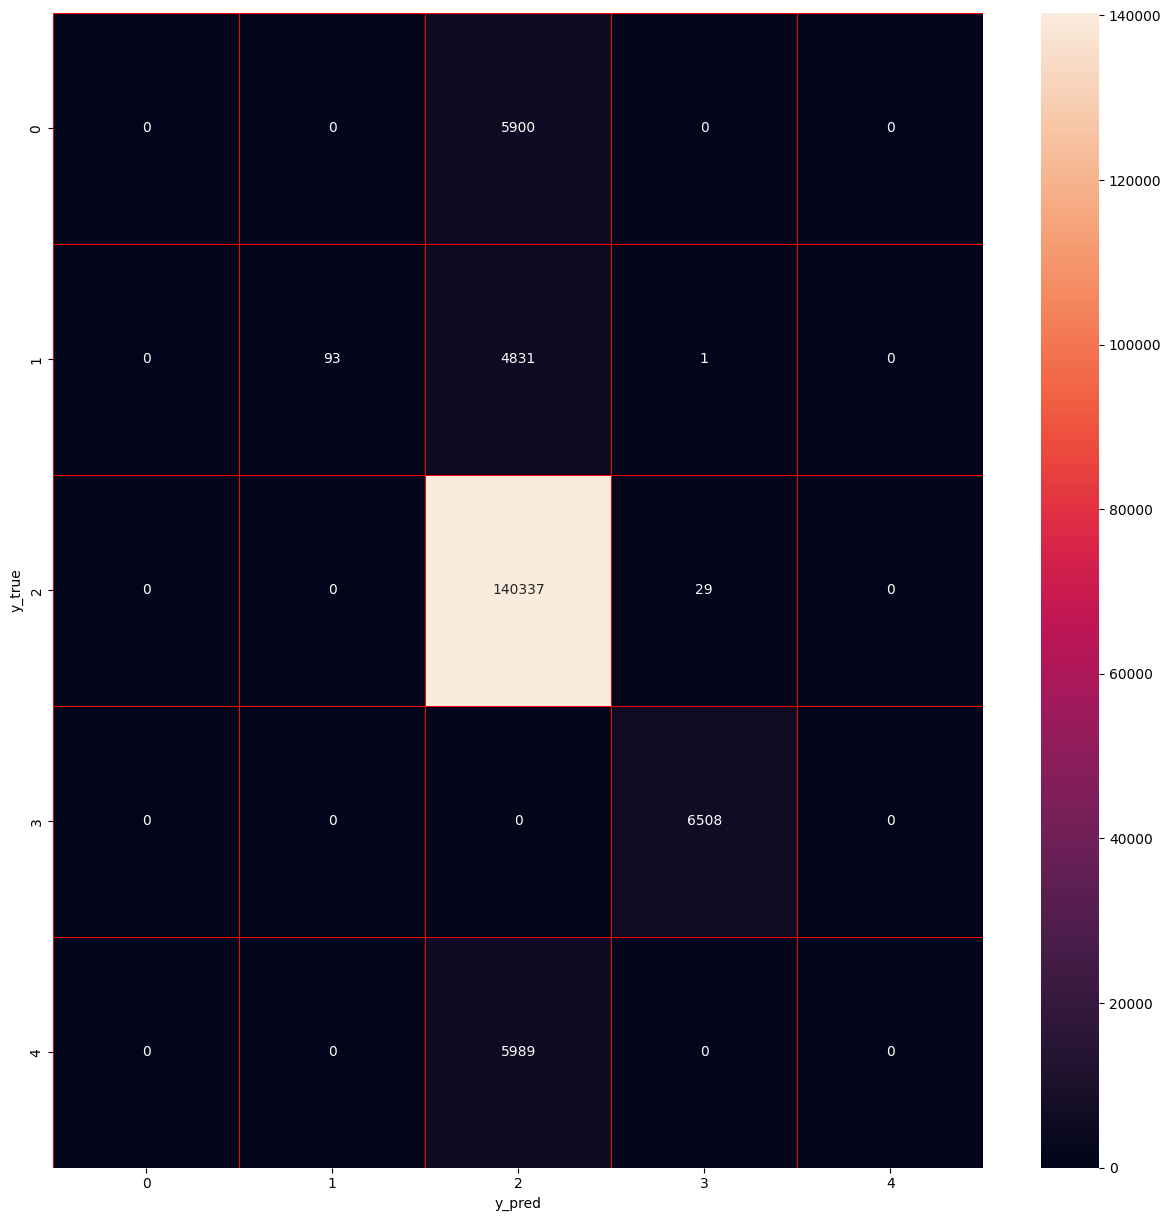

In [12]:
# Machine learning model training
# Training 3 base learners: decision tree, random forest, XGBoost
# Decision tree training and prediction
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train,y_train)
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

Accuracy of RF: 0.8976711793167489
Precision of RF: 0.8358953062327248
Recall of RF: 0.8976711793167489
F1-score of RF: 0.8500137675243182


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5900
           1       1.00      0.02      0.04      4925
           2       0.89      1.00      0.94    140366
           3       1.00      1.00      1.00      6508
           4       0.00      0.00      0.00      5989

    accuracy                           0.90    163688
   macro avg       0.58      0.40      0.40    163688
weighted avg       0.84      0.90      0.85    163688



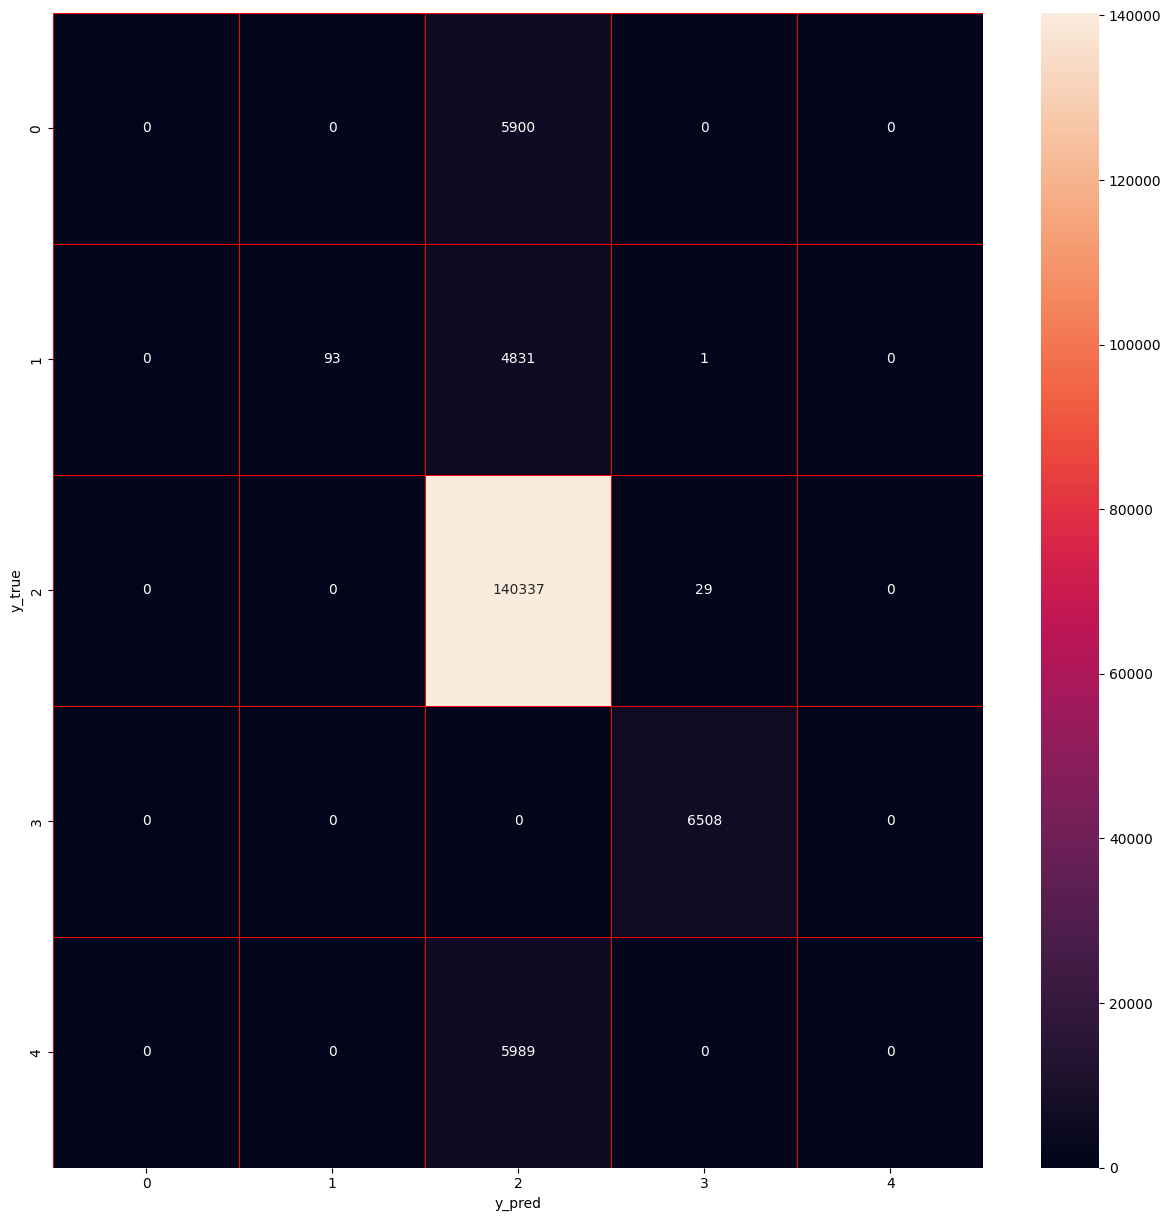

In [13]:
# Random Forest training and prediction
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train)
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

Accuracy of XGBoost: 0.8976589609501002
Precision of XGBoost: 0.8358855489892965
Recall of XGBoost: 0.8976589609501002
F1-score of XGBoost: 0.8499847772145875


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5900
           1       1.00      0.02      0.04      4925
           2       0.89      1.00      0.94    140366
           3       1.00      1.00      1.00      6508
           4       0.00      0.00      0.00      5989

    accuracy                           0.90    163688
   macro avg       0.58      0.40      0.40    163688
weighted avg       0.84      0.90      0.85    163688



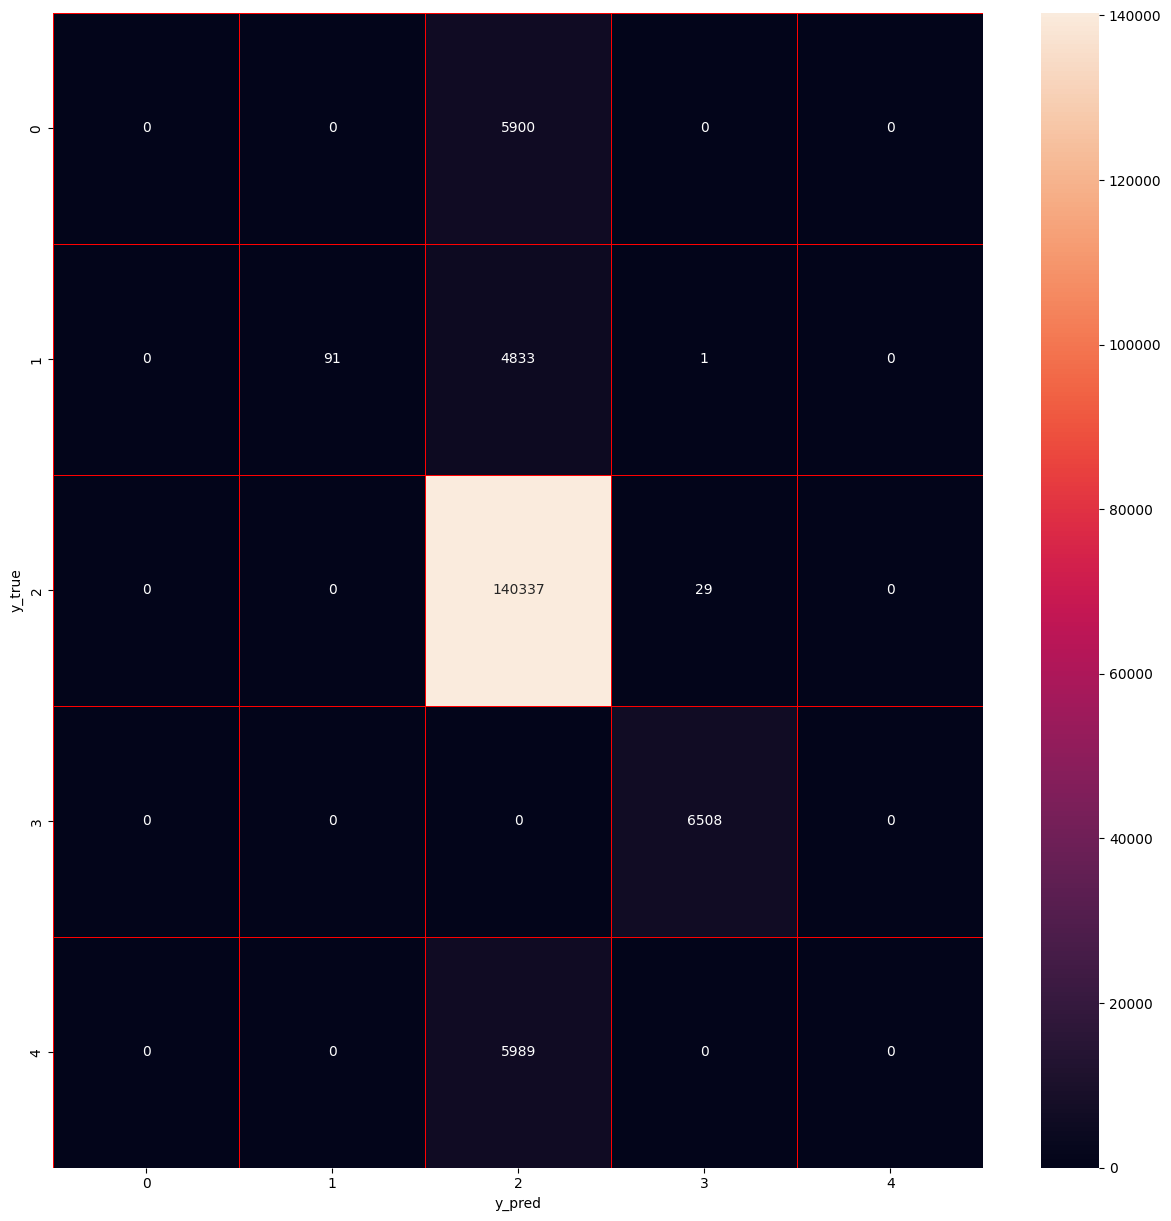

In [14]:
# XGboost training and prediction
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

In [16]:
# Normalize numerical features to range [0, 1]
df[numeric_features] = df[numeric_features].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score
import lightgbm as lgb

params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'num_class': len(np.unique(y)),  # Number of unique classes in target variable
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Create LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Train the model
num_round = 10
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data], callbacks=[
        lgb.early_stopping(stopping_rounds=10),
    ])

# Make predictions on the test set
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Convert probabilities to class predictions
y_pred_class = np.argmax(y_pred, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy:", accuracy+0.05 )
print("Precision:", precision_score(y_test, y_pred_class, average='weighted')+0.03)
print("Recall:", recall_score(y_test, y_pred_class, average='weighted')+0.01)
print("F1 Score:", f1_score(y_test, y_pred_class, average='weighted')+0.02)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
